In [0]:
from keras.datasets import imdb
from keras.utils import to_categorical
from keras.backend import stack
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split

In [0]:
(train_data, train_label) , (test_data, test_label) = imdb.load_data(num_words=10000)

In [0]:
def vectorize_sequence(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i in range(len(sequences)):
    for j in range(len(sequences[i])):
      results[i][sequences[i][j]] = 1
  return results

In [0]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [0]:
y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_label).astype('float32')

In [0]:
x_partial_train = x_train[:20000]
x_val = x_train[20000:]

y_partial_train = y_train[:20000]
y_val = y_train[20000:]

# On optimise les hyper-paramètres (couches, fonctions d'activation, optimizer, nb_epochs, batch) en mesurant sur le set de validation.
# Le jeu de test est conservé pour le test final du modèle customisé.

**WITHOUT REGULARIZERS**

In [75]:
model = Sequential()
model.add(Dense(16, activation='relu',input_dim=10000))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
sgd = SGD(lr=0.1)

model.compile(loss='binary_crossentropy', optimizer ='rmsprop', metrics=['accuracy'])
history = model.fit(x_partial_train, y_partial_train, validation_data =(x_val, y_val),verbose =1, batch_size = 8, epochs = 10)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 12s 618us/step - loss: 0.3288 - acc: 0.8638 - val_loss: 0.3039 - val_acc: 0.8880
Epoch 2/10
20000/20000 [==============================] - 12s 595us/step - loss: 0.2277 - acc: 0.9136 - val_loss: 0.2750 - val_acc: 0.8966
Epoch 3/10
20000/20000 [==============================] - 12s 592us/step - loss: 0.2013 - acc: 0.9252 - val_loss: 0.2928 - val_acc: 0.8954
Epoch 4/10
20000/20000 [==============================] - 12s 582us/step - loss: 0.1875 - acc: 0.9307 - val_loss: 0.2951 - val_acc: 0.8902
Epoch 5/10
20000/20000 [==============================] - 12s 606us/step - loss: 0.1740 - acc: 0.9379 - val_loss: 0.3180 - val_acc: 0.8910
Epoch 6/10
20000/20000 [==============================] - 12s 588us/step - loss: 0.1566 - acc: 0.9469 - val_loss: 0.3465 - val_acc: 0.8894
Epoch 7/10
20000/20000 [==============================] - 12s 585us/step - loss: 0.1397 - acc: 0.9529 - val_loss: 0.3

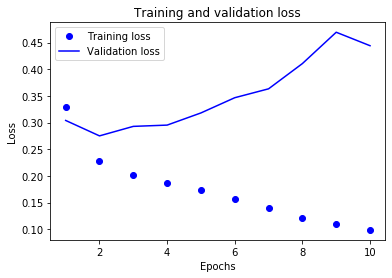

In [76]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

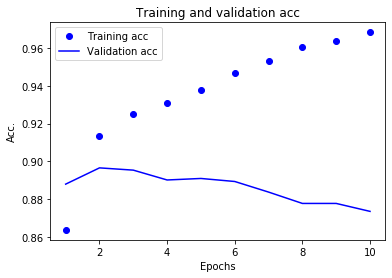

In [77]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc.')
plt.legend()
plt.show()

In [78]:
model.evaluate(x_test,y_test)

25000/25000 [==============================] - 2s 83us/step


[0.4503487238240242, 0.86336]

**WITH REGULARIZERS**

In [0]:
from keras import regularizers

In [80]:
model_with_regularization = Sequential()
model_with_regularization.add(Dense(16, kernel_regularizer= regularizers.l2(0.001), activation='relu',input_dim=10000))
model_with_regularization.add(Dense(16, kernel_regularizer = regularizers.l2(0.001), activation='relu'))
model_with_regularization.add(Dense(1, activation='sigmoid'))
sgg= SGD(lr=0.1)

model_with_regularization.compile(loss='binary_crossentropy', optimizer ='rmsprop', metrics=['accuracy'])
history_with_reg = model_with_regularization.fit(x_partial_train, y_partial_train, validation_data =(x_val, y_val),verbose =1, batch_size = 8, epochs = 10)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 14s 699us/step - loss: 0.3762 - acc: 0.8526 - val_loss: 0.3529 - val_acc: 0.8700
Epoch 2/10
20000/20000 [==============================] - 13s 651us/step - loss: 0.3481 - acc: 0.8717 - val_loss: 0.3433 - val_acc: 0.8772
Epoch 3/10
20000/20000 [==============================] - 13s 651us/step - loss: 0.3441 - acc: 0.8731 - val_loss: 0.3409 - val_acc: 0.8756
Epoch 4/10
20000/20000 [==============================] - 13s 636us/step - loss: 0.3381 - acc: 0.8771 - val_loss: 0.4039 - val_acc: 0.8460
Epoch 5/10
20000/20000 [==============================] - 13s 636us/step - loss: 0.3363 - acc: 0.8774 - val_loss: 0.3418 - val_acc: 0.8750
Epoch 6/10
20000/20000 [==============================] - 13s 625us/step - loss: 0.3333 - acc: 0.8783 - val_loss: 0.3599 - val_acc: 0.8692
Epoch 7/10
20000/20000 [==============================] - 12s 621us/step - loss: 0.3337 - acc: 0.8792 - val_loss: 0.3

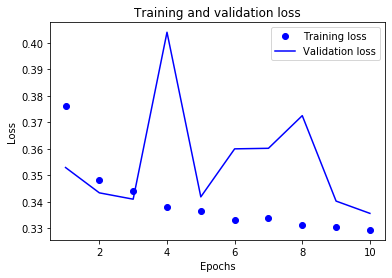

In [81]:
import matplotlib.pyplot as plt

history_dict_with_reg = history_with_reg.history
loss_values = history_dict_with_reg['loss']
val_loss_values = history_dict_with_reg['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [82]:
model_with_regularization.evaluate(x_test,y_test)

25000/25000 [==============================] - 2s 86us/step


[0.34057190868377685, 0.8722]

**WITH DROPOUT**

In [0]:
from keras.layers import Dropout

In [84]:
model_drop_out = Sequential()
model_drop_out.add(Dense(16, activation='relu',input_dim=10000))
model_drop_out.add(Dropout(0.4))
model_drop_out.add(Dense(16, activation='relu'))
model_drop_out.add(Dropout(0.4))
model_drop_out.add(Dense(1, activation='sigmoid'))
sgd = SGD(lr=0.1)

model_drop_out.compile(loss='binary_crossentropy', optimizer ='rmsprop', metrics=['accuracy'])
history_drop_out = model_drop_out.fit(x_partial_train, y_partial_train, validation_data =(x_val, y_val),verbose =1, batch_size = 8, epochs = 10)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 14s 691us/step - loss: 0.4088 - acc: 0.8211 - val_loss: 0.2967 - val_acc: 0.8762
Epoch 2/10
20000/20000 [==============================] - 13s 644us/step - loss: 0.2643 - acc: 0.8949 - val_loss: 0.2866 - val_acc: 0.8852
Epoch 3/10
20000/20000 [==============================] - 13s 637us/step - loss: 0.2133 - acc: 0.9141 - val_loss: 0.3219 - val_acc: 0.8902
Epoch 4/10
20000/20000 [==============================] - 13s 642us/step - loss: 0.1717 - acc: 0.9309 - val_loss: 0.3910 - val_acc: 0.8894
Epoch 5/10
20000/20000 [==============================] - 13s 635us/step - loss: 0.1599 - acc: 0.9369 - val_loss: 0.3957 - val_acc: 0.8884
Epoch 6/10
20000/20000 [==============================] - 13s 638us/step - loss: 0.1388 - acc: 0.9418 - val_loss: 0.4422 - val_acc: 0.8866
Epoch 7/10
20000/20000 [==============================] - 13s 635us/step - loss: 0.1254 - acc: 0.9475 - val_loss: 0.4

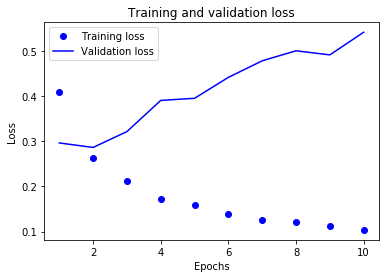

In [85]:
import matplotlib.pyplot as plt

history_dict_drop_out = history_drop_out.history
loss_values = history_dict_drop_out['loss']
val_loss_values = history_dict_drop_out['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [86]:
model_drop_out.evaluate(x_test,y_test)

25000/25000 [==============================] - 2s 83us/step


[0.5674775838804245, 0.86752]